# In this notebook we are going to create a Decision Tree Classifier model using python .
In this lesson our task is to build a Decision tree classifier model to classify what kind of users on a social network will purchase a certain product that a company publish ads for based on previous customer data understand the dataset provided ('Social_Network_Ads.csv') carefully.Now, we will build our model let's get started !!

First,We will include some libreries!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x= data.iloc[:,[2,3]].values
# print(x)
y=data.iloc[:,4].values
# print(y)

Till now, we have done the same as in previous model called our data and creating the dependent and independent variable.

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

Above we have spllited our data into training and testing set.

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)


Above we have scalled our data using the standard scalar class data but the purpose of scalling here is not for error reduction as the previous model use euclidian distance between point to measure error so by scalling(fitting them in a certain range ) the data, we are decreasing the error significantly (As distance between them decreases by scalling).In Decision Tree the error calculation is based on entropy of outcomes rather than the euclidian distance. Hence, scalling the data makes it difficult for decision tree to classify properly still we are scalling because scalling will make our data easier to plot.

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Above we have called the sklearn.tree library from which we have imported the DecisionTreeClassifier class using it we have created our clasifier object.
Than we have trained our model using the train set using the fit method.

In [7]:
y_pred =classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[62,  6],
       [ 3, 29]])

Above we have predicted the outcome for the test set and saved it in the y_pred variable . Then we have used the confusion matrix to compare our predictions with the test set outcome.The prediction of our model is mojorly correct yet it gives us 9 incorrect prediction.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


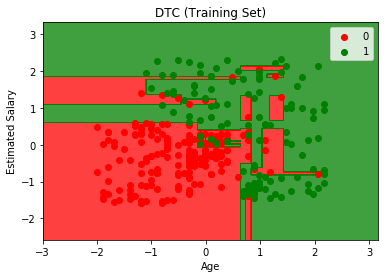

In [9]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                     np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c= ListedColormap(('red','green'))(i),label=j)
plt.title('DTC (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Above we have plotted the graph of our DTC model which is trained our the training set.
As we can see the graph has decision boundaries with only horizontal and vertical lines as decision tree algorithm is designed to reduce the entropy of outcome with each cut in the dataset these cut are made by only horizontal and vertical lines which we are seeing above.

Above we can also see that our model is trying to catch every red and green points in there respective region ,doing this it has started to overfit the data.As such model with random patches will perform poor generally.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


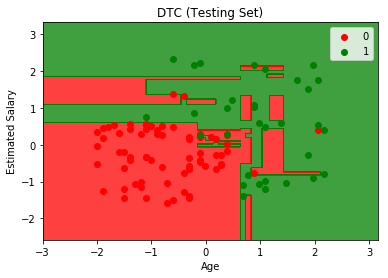

In [10]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                     np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c= ListedColormap(('red','green'))(i),label=j)
plt.title('DTC (Testing Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Above we have plotted the graph of our DTC model whose classifier boundary is trained using the training set .We can see that our model is pretty much overfitting the result, thus predicting incorrect outcomes.those red patches in the green region and vice-versa lead to over-fitting further leads to incorrect prediction.